In [1]:
import pandas as pd
trainDS = pd.read_csv('titanic_train.csv')
trainDS

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


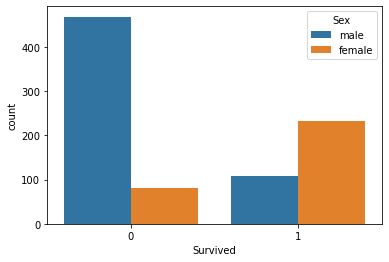

In [2]:
#Visualize
import seaborn as sns
sns.countplot(trainDS['Survived'],hue =trainDS['Sex'])

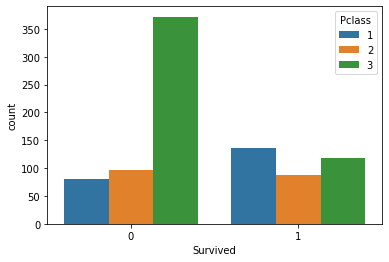

In [3]:
sns.countplot(trainDS['Survived'],hue =trainDS['Pclass'])

In [4]:
#Look for null values
trainDS.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


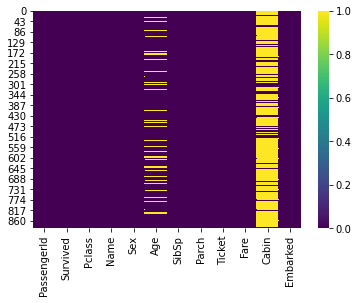

In [5]:
#plot null values to heatMAP
sns.heatmap(trainDS.isnull(), cmap='viridis')

In [6]:
#data cleaninng begins
# remove null values for cabin -> drop it
trainDS.drop('Cabin',axis=1,inplace=True)
trainDS

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [7]:
# remove null values for age -> replace  with mean age
ageDS =trainDS[['Age']]
meanAge = ageDS.mean()
meanAge

Age    29.699118
dtype: float64

In [8]:
#[[]] ->data frame []-> series
normalizedAgeDS = trainDS[['Age']].fillna(value=meanAge)
normalizedAgeDS

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [9]:
#put in data
trainDS['Age']= normalizedAgeDS

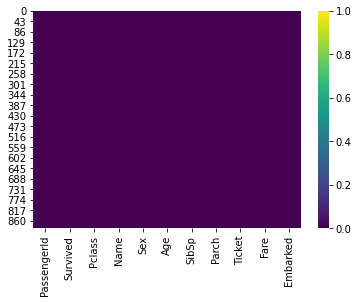

In [10]:
#check data again
sns.heatmap(trainDS.isnull(), cmap='viridis')

In [11]:
#drop irrelevant features (like string here (adrress etc))
trainDS.drop(['Name','Ticket'],axis=1,inplace=True)

In [12]:
trainDS

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [13]:
# split column to dummy colums (sex m f to 0,1) or ( emrkrked s c q to 0 1 2)
pd.get_dummies(trainDS['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [14]:
# drop non essentails first male = 0 female has to be 1
sexNormalised = pd.get_dummies(trainDS['Sex'],drop_first=True)
sexNormalised

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [15]:
embarkNormailsed = pd.get_dummies(trainDS['Embarked'],drop_first=True)
embarkNormailsed

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [16]:
# Add normalised columns to dataset and remove old
#pass list of columns as i/p and axis as 1 indicates colums
trainDS = pd.concat([trainDS,embarkNormailsed,sexNormalised],axis =1)
trainDS

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S,male
0,1,0,3,male,22.000000,1,0,7.2500,S,0,1,1
1,2,1,1,female,38.000000,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.000000,0,0,7.9250,S,0,1,0
3,4,1,1,female,35.000000,1,0,53.1000,S,0,1,0
4,5,0,3,male,35.000000,0,0,8.0500,S,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S,0,1,1
887,888,1,1,female,19.000000,0,0,30.0000,S,0,1,0
888,889,0,3,female,29.699118,1,2,23.4500,S,0,1,0
889,890,1,1,male,26.000000,0,0,30.0000,C,0,0,1


In [17]:
trainDS.drop(['PassengerId','Embarked','Sex'],axis=1,inplace =True)
trainDS

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.000000,1,0,7.2500,0,1,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,1,0
3,1,1,35.000000,1,0,53.1000,0,1,0
4,0,3,35.000000,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,1
887,1,1,19.000000,0,0,30.0000,0,1,0
888,0,3,29.699118,1,2,23.4500,0,1,0
889,1,1,26.000000,0,0,30.0000,0,0,1


In [41]:
#split
X= trainDS.drop('Survived',axis=1)
y= trainDS['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [40]:
# Import model
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()
#train
logModel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
#predict
pred = logModel.predict(X_test)

In [55]:
#Metrices
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       207
           1       0.79      0.71      0.75       150

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.80       357

[[179  28]
 [ 44 106]]
